<a href="https://colab.research.google.com/github/halikhani/ML_Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Part 0- Utils**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## **Part 1- Ordinary ML models**

### **1-1 Loading data**

In [ ]:
import io
from zipfile import ZipFile
!wget https://www.dropbox.com/s/gesb5v1q0cwtrmn/MLFinalProjectDataset.zip
with ZipFile("MLFinalProjectDataset.zip",'r') as zip:
  train_data = pd.read_csv(zip.open("train_data.csv"))
  test_data  = pd.read_csv(zip.open("test_data.csv"))

--2021-02-09 11:55:01--  https://www.dropbox.com/s/gesb5v1q0cwtrmn/MLFinalProjectDataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/gesb5v1q0cwtrmn/MLFinalProjectDataset.zip [following]
--2021-02-09 11:55:02--  https://www.dropbox.com/s/raw/gesb5v1q0cwtrmn/MLFinalProjectDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7206989cf466c331b0542ac785.dl.dropboxusercontent.com/cd/0/inline/BInHDywPBjDbkX0EkDecifMMFWGonPUlY17xhPky04ygikznfRXaoxbpzhC7Mm4pbIaGL2pmiYTy89xZSkoCrgjonJBqZ_uzLnJV6zMGaTWoFBL9cGu1jnj14ba8YZupALU/file# [following]
--2021-02-09 11:55:04--  https://uc7206989cf466c331b0542ac785.dl.dropboxusercontent.com/cd/0/inline/BInHDywPBjDbkX0EkDecifMMFWGonPUlY17xhPky04ygikznfRXaoxbpzhC7Mm4pbIaGL2pm

In [ ]:
train_data.head()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
0,4706262,1578429005696,4,0,290,7855,6,10,6262,0,0,0,11,3543873,2688642,1
1,4706262,1578429005696,4,0,1386,7967,15,10,6262,0,0,0,11,3543873,2688642,0
2,4706262,1578429005696,4,0,378,1160,3610,10,6262,0,0,0,11,3543873,2688642,0
3,4706267,1578429007726,4,0,6642,804,3475,14,607,1,3,0,15,6245475,2688641,1
4,4706267,1578429007726,4,0,8414,6155,5271,14,607,1,3,0,15,6245475,2688641,0


### **1-2 An overview on columns data distribution and unique value counts**

In [ ]:
print("shape:" , train_data.shape)
print("unique count:\n",train_data.apply(lambda col: len(col.unique())),sep="")

shape: (3768416, 16)
unique count:
displayId       842181
timestamp       773941
dayOfWeek            7
hourOfDay           24
advertiserId       200
campaignId         474
creativeId        2696
publisher          759
widgetId          1165
device               4
os                   7
browser             75
source            2868
docId           156623
userId          669248
clicked              2
dtype: int64


### **1-3 plotting the corr matrix of features**

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
displayId,1.000000,-0.999576,0.267008,-0.109261,-0.038739,0.086692,-0.298989,-0.093374,0.015872,-0.047004,-0.023761,-0.010558,-0.086136,-0.149559,0.624640,-0.011117
timestamp,-0.999576,1.000000,-0.274981,0.096178,0.039642,-0.085933,0.298288,0.092444,-0.015919,0.049721,0.025349,0.010843,0.084942,0.150770,-0.624653,0.010788
dayOfWeek,0.267008,-0.274981,1.000000,0.014209,-0.054472,0.027222,-0.068386,-0.024605,0.020309,-0.046274,-0.020832,-0.003472,-0.028159,-0.057686,0.169751,0.005541
hourOfDay,-0.109261,0.096178,0.014209,1.000000,-0.062731,-0.038465,0.089439,0.038169,0.015599,-0.098947,-0.050830,-0.011445,0.033141,-0.048379,-0.057528,0.025827
advertiserId,-0.038739,0.039642,-0.054472,-0.062731,1.000000,-0.006102,-0.088942,0.028112,-0.018315,0.227712,0.175065,0.058017,0.013185,-0.022146,-0.018462,-0.018646
campaignId,0.086692,-0.085933,0.027222,-0.038465,-0.006102,1.000000,0.058803,0.042668,0.023455,0.112267,0.090107,0.033739,0.017528,-0.038636,0.058037,-0.007142
creativeId,-0.298989,0.298288,-0.068386,0.089439,-0.088942,0.058803,1.000000,0.026256,0.004654,0.073650,0.047017,0.015880,0.018633,0.043661,-0.202957,-0.027898
publisher,-0.093374,0.092444,-0.024605,0.038169,0.028112,0.042668,0.026256,1.000000,-0.121920,0.031951,0.013144,0.034178,0.899853,0.093463,-0.037743,0.020335
widgetId,0.015872,-0.015919,0.020309,0.015599,-0.018315,0.023455,0.004654,-0.121920,1.000000,0.007146,0.007401,-0.012770,-0.169247,0.017874,-0.012772,-0.012172
device,-0.047004,0.049721,-0.046274,-0.098947,0.227712,0.112267,0.073650,0.031951,0.007146,1.000000,0.731198,0.225787,-0.004713,-0.051937,-0.033065,-0.060638


**Useful notes about the correlation matrix:**

*   High correlation between source and the publisher which is because of their intrinsic relation.
*   A relatively high correlation between userid and displayid.



===================== Hamidreza (start) =================

### **1-4 Some useful plots of the data**

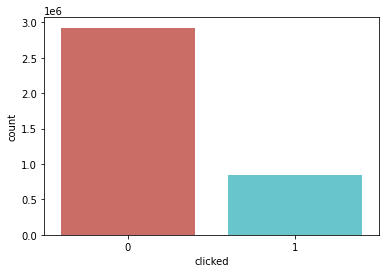

In [ ]:
# Ratio of clicked rows over all data
import seaborn as sns
sns.countplot(x='clicked',data=train_data, palette='hls')
plt.show();

In [ ]:
train_data['clicked'].value_counts()/len(train_data)

0    0.776516
1    0.223484
Name: clicked, dtype: float64

**We can see the imbalanceness in data that should be taken care of.**

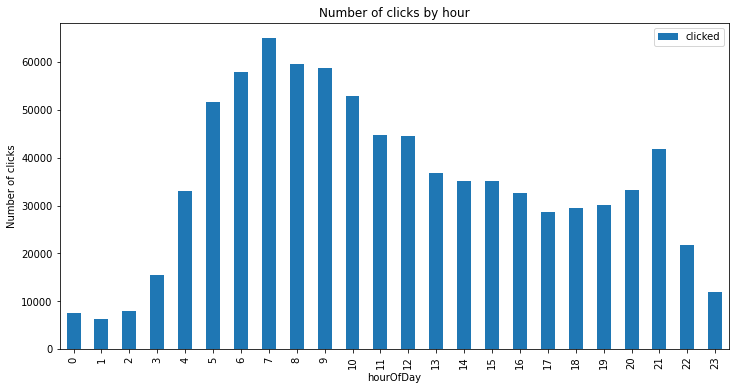

In [ ]:
# click count distribution over hours of day
hourly = train_data.groupby('hourOfDay').agg({'clicked':'sum'})
hourly.plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

**As we can see here, 7:00 A.M. has the most number of clicks compared to other hours (kind of wierd hour!). Anyway, this feature seems helpful and should not be droped in the models we are going the fit on the data**. 

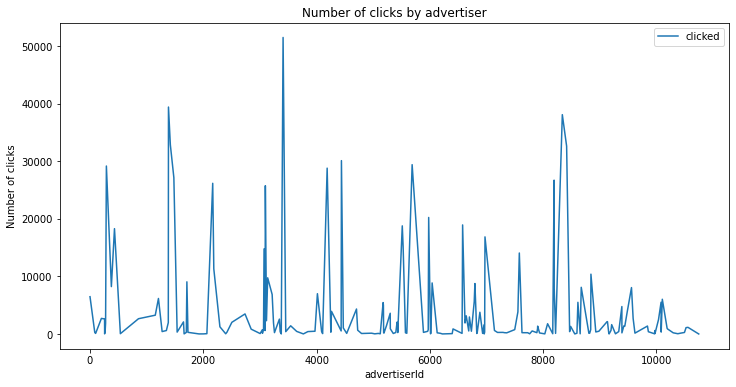

In [ ]:
# click distribution over different advertisers.
train_data.groupby('advertiserId').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by advertiser');

**Some adversiters obviously have more click rate than others. Another important feature!**

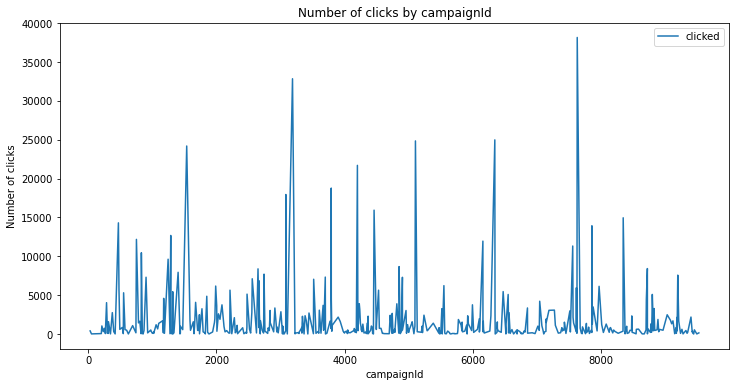

In [ ]:
# click distribution over different campaigns.
train_data.groupby('campaignId').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by campaignId');

**Again, the relation between campaign and click rate can be observed**

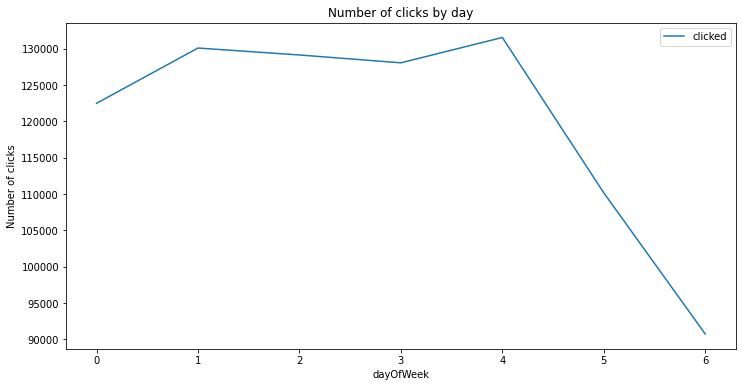

In [ ]:
# Click counts per day of week.
train_data.groupby('dayOfWeek').agg({'clicked':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by day');

**Notable difference between different days. Should be considered.**

In [ ]:
train_data.groupby('dayOfWeek').agg({'clicked':'sum'})

,clicked
dayOfWeek,
0,122478
1,130088
2,129133
3,128053
4,131543
5,110157
6,90729


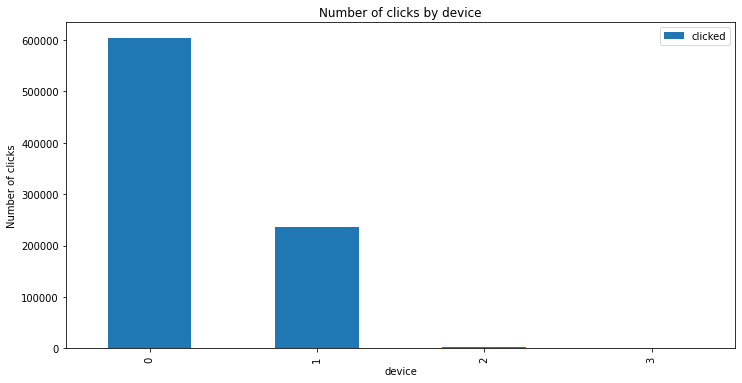

In [ ]:
# click count distribution over different devices
hourly = train_data.groupby('device').agg({'clicked':'sum'})
hourly.plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by device');

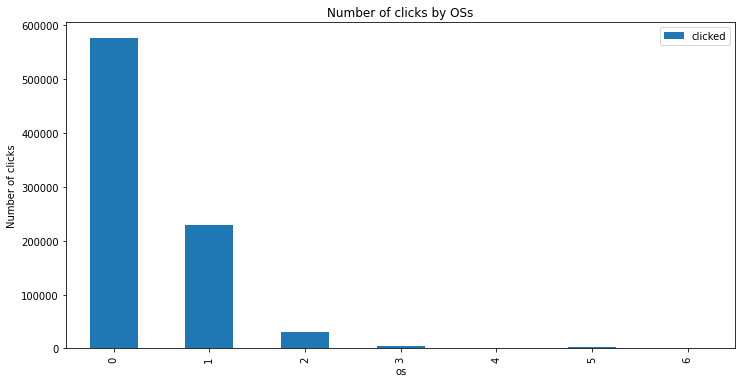

In [ ]:
# click count distribution over different OSs
hourly = train_data.groupby('os').agg({'clicked':'sum'})
hourly.plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by OSs');

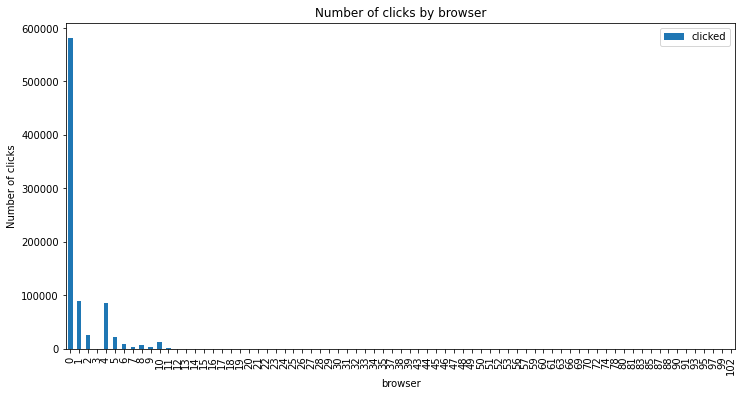

In [ ]:
# click count distribution over different browsers
hourly = train_data.groupby('browser').agg({'clicked':'sum'})
hourly.plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by browser');

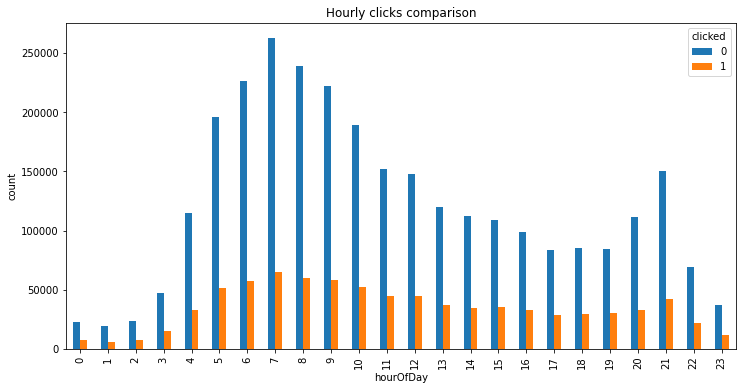

In [ ]:
# Another useful plot about observing the click ratio for every day
train_data.groupby(['hourOfDay', 'clicked']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly clicks comparison');

**Again, 7 A.M. has the most viewed and clicked ads between all days of week.**

### **1-5 Feature Selection**

**For the first part (performing ordinary supervised learning methods on the dataset), since we don't look for individual relationship between feature values, we can drop columns that cannot really enhance the learning process. These features are:**


1.   userId: cannot be helpful for the first part (but useful for Factorization Machines)
2.   Timestamp: we have the day and hour, so this columns can be ommited too. (Furthermore, the structure of the timestamp is somehow ambiguous!)




### **1-6 Fitting Random Forest, Linear Regression, XGBoost, and SVM on the data**

**Since We have a seperate test data, we split the train data into 2 categories by train_test_split of sklearn.model_selection (the generated test from this method respresents the validation set). We use the usual one third of the data for validating.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, recall_score, auc, precision_score, log_loss
tmp = train_data.copy()
tmp_y = tmp['clicked']
tmp_X = tmp.drop(columns=['timestamp', 'userId'])
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y, test_size = 0.33, stratify = tmp_y, random_state = 42)


In [ ]:
test_target = X_test['clicked']
X_train = X_train.drop(columns=['clicked'])
X_test = X_test.drop(columns=['clicked'])

#### **1-6-1 Random Forest**

We tune number of estimators, but at the end we can see that the performance is not satisfying in any setting. (We use 10 number of estimators from now on)

In [ ]:
n_stimators = [10, 15, 20]
accuracy = []
precision = []
recall = []
f1 = []
auc = []
logLoss = []
for i in n_stimators:
  rf = RandomForestClassifier(n_estimators = i, random_state = 42)
  rf.fit(X_train, y_train)
  y_pred_rf = rf.predict(X_test)

  accuracy_rf = accuracy_score(y_test, y_pred_rf)
  accuracy.append(accuracy_rf)

  precision_score_rf  = precision_score(y_test, y_pred_rf)
  precision.append(precision_score_rf)

  recall_rf = recall_score(y_test, y_pred_rf)
  recall.append(recall_rf)

  f1_score_rf = f1_score(y_test, y_pred_rf)
  f1.append(f1_score_rf)

  auc_score_rf = roc_auc_score(y_test, y_pred_rf)
  auc.append(auc_score_rf)
  log_loss_rf = log_loss(y_test, y_pred_rf)
  logLoss.append(log_loss_rf)

NameError: ignored

In [ ]:
print(f1)

[]


In [ ]:
print(auc)

[]


In [ ]:
print(logLoss)

[]


**NOT GOOD results:( seems we should should deal with imbalanced data first**

#### **1-6-2 Undersampling for dealing with imbalanced data**

In [ ]:
from sklearn.utils import resample
# us : undersampled
us_X = pd.concat([X_train, y_train], axis=1)
clicked = us_X[us_X.clicked == 1]
not_clicked = us_X[us_X.clicked == 0]

# downsample majority(not clicked)
not_clicked_downsampled = resample(not_clicked,
                                replace = False, # sample without replacement
                                n_samples = len(clicked), # match minority n
                                random_state = 23)
downsampled = pd.concat([not_clicked_downsampled, clicked])
downsampled.clicked.value_counts()

1    564261
0    564261
Name: clicked, dtype: int64

In [ ]:
ds_y_train = downsampled['clicked']
ds_X_train = downsampled.drop(columns=['clicked'])


In [ ]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(ds_X_train, ds_y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
features = pd.Series(rf.feature_importances_,
                          index=ds_X_train.columns)
features = features.sort_values(ascending = False)
features

displayId       0.294181
docId           0.206318
hourOfDay       0.096117
creativeId      0.092357
widgetId        0.054455
browser         0.047605
dayOfWeek       0.040953
source          0.040331
campaignId      0.039635
publisher       0.039346
advertiserId    0.036961
os              0.007141
device          0.004599
dtype: float64

**In Random forest model, we can see that the four most important features affecting the result of the model are displayId, docId, hourOfDay, and creativeId**

In [ ]:
from sklearn.metrics import f1_score, recall_score, auc
acc_rf = accuracy_score(y_test, y_pred_rf)
print('accuracy: '+ str(acc_rf))
print('f1_score: '+ str(f1_score(y_test, y_pred_rf)))
print('cross entropy loss(Log loss): '+ str(log_loss(y_test, y_pred_rf)))
print('roc_auc_score: '+ str(roc_auc_score(y_test, y_pred_rf)))


NameError: ignored

**As we can see here, the recall score improved significantly (approx 31 percent), and f1_score and auc also improved by approximately 10 and 3 percent.**

#### **1-6-3 Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ds_X_train, ds_y_train)


In [ ]:
y_pred_lr = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('F1_score of logistic regression classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred_lr)))
print('recall score of logistic regression classifier on test set: {:.2f}'.format(recall_score(y_test, y_pred_lr)))
print('roc_auc_score of logistic regression classifier on test set: {:.2f}'.format(roc_auc_score(y_test, y_pred_lr)))
print('cross entropy loss of logistic regression classifier on test set: {:.2f}'.format(log_loss(y_test, y_pred_lr)))

We got better results in terms of F1 and auc score from random forest than Logistic regression.

#### **1-6-4 XGBoost**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=23)
xg_cl.fit(ds_X_train, ds_y_train)
preds = xg_cl.predict(X_test)

In [ ]:
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: %f" % (accuracy))
print('f1_score: '+ str(f1_score(y_test, preds)))
print('recall: '+ str(recall_score(y_test, preds)))
print('roc_auc_score: '+ str(roc_auc_score(y_test, preds)))
print('cross entropy loss: '+ str(log_loss(y_test, preds)))

#### **1-6-5 lets try upsampling**

In [ ]:
clicked_upsampled = resample(clicked,
                          replace=True, # sample with replacement
                          n_samples=len(not_clicked), # match number in majority class
                          random_state=23) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_clicked, clicked_upsampled])
upsampled.clicked.value_counts()

In [ ]:
us_y_train = upsampled['clicked']
us_X_train = upsampled.drop(columns=['clicked'])
len(us_X_train)

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(us_X_train, us_y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print('accuracy: '+ str(accuracy_score(y_test, y_pred_rf)))
print('f1_score: '+ str(f1_score(y_test, y_pred_rf)))
print('cross entropy loss(Log loss): '+ str(log_loss(y_test, y_pred_rf)))
print('roc_auc_score: '+ str(roc_auc_score(y_test, y_pred_rf)))
print('cross entropy: '+ str(log_loss(y_test, y_pred_rf)))


In [ ]:
logreg = LogisticRegression()
logreg.fit(us_X_train, us_y_train)
y_pred_lr = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('F1_score of logistic regression classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred_lr)))
print('recall score of logistic regression classifier on test set: {:.2f}'.format(recall_score(y_test, y_pred_lr)))
print('cross entropy score of logistic regression classifier on test set: {:.2f}'.format(log_loss(y_test, y_pred_lr)))
print('auc score of logistic regression classifier on test set: {:.2f}'.format(roc_auc_score(y_test, y_pred_lr)))

In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=23)
xg_cl.fit(us_X_train, us_y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: %f" % (accuracy))
print('f1_score: '+ str(f1_score(y_test, preds)))
print('recall: '+ str(recall_score(y_test, preds)))
print('auc: '+ str(roc_auc_score(y_test, preds)))
print('cross entropy: '+ str(log_loss(y_test, preds)))

In [ ]:
X_test['test_target'] = preds
X_test['clicked'] = y_test

In [ ]:
compare = X_test[['displayId', 'clicked', 'test_target']]
compare.groupby('displayId').sum()

#### **1-6-6 SVM**

Undersampling

It's impossible to run SVM on this much data so we  make our data smaller. Sklearn page even says that svm algorithm is good only for data with a couple of 10000 rows.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, recall_score, auc, precision_score, log_loss, classification_report
tmp = train_data.sample(50000,random_state=42)
tmp_y = tmp['clicked']
tmp_X = tmp.drop(columns=['timestamp'])
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y, train_size = 20000, stratify = tmp_y, random_state = 42)
test_target = X_test['clicked']
X_train = X_train.drop(columns=['clicked'])
X_test = X_test.drop(columns=['clicked'])

from sklearn.utils import resample
# us : undersampled
us_X = pd.concat([X_train, y_train], axis=1)
clicked = us_X[us_X.clicked == 1]
not_clicked = us_X[us_X.clicked == 0]

# downsample majority(not clicked)
not_clicked_downsampled = resample(not_clicked,
                                replace = False, # sample without replacement
                                n_samples = len(clicked), # match minority n
                                random_state = 23)
downsampled = pd.concat([not_clicked_downsampled, clicked])
print(downsampled.clicked.value_counts())

ds_y_train = downsampled['clicked']
ds_X_train = downsampled.drop(columns=['clicked'])

1    4414
0    4414
Name: clicked, dtype: int64


In [ ]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(ds_X_train,ds_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
preds = svm_clf.predict(X_test)
print("accuracy: %f" % (svm_clf.score(X_test,y_test)))
print('f1_score: '+ str(f1_score(y_test, preds)))
print('recall: '+ str(recall_score(y_test, preds)))
print('auc: '+ str(roc_auc_score(y_test, preds)))
print('cross entropy: '+ str(log_loss(y_test, preds)))
print(classification_report(y_test, preds))

accuracy: 0.614367
f1_score: 0.25240710823909535
recall: 0.29501510574018125
auc: 0.499902762450929
cross entropy: 13.319487431139496
              precision    recall  f1-score   support

           0       0.78      0.70      0.74     23380
           1       0.22      0.30      0.25      6620

    accuracy                           0.61     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.66      0.61      0.63     30000



Upsampling

In [ ]:
clicked_upsampled = resample(clicked,
                          replace=True, # sample with replacement
                          n_samples=len(not_clicked), # match number in majority class
                          random_state=23) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_clicked, clicked_upsampled])
upsampled.clicked.value_counts()
us_y_train = upsampled['clicked']
us_X_train = upsampled.drop(columns=['clicked'])
len(us_X_train)

31172

In [ ]:
from sklearn import svm
us_svm_clf = svm.SVC()
us_svm_clf.fit(us_X_train,us_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
preds = us_svm_clf.predict(X_test)
print("accuracy: %f" % (us_svm_clf.score(X_test,y_test)))
print('f1_score: '+ str(f1_score(y_test, preds)))
print('recall: '+ str(recall_score(y_test, preds)))
print('auc: '+ str(roc_auc_score(y_test, preds)))
print('cross entropy: '+ str(log_loss(y_test, preds)))
print(classification_report(y_test, preds))

accuracy: 0.551400
f1_score: 0.29898947807063236
recall: 0.4335347432024169
auc: 0.5091540268621152
cross entropy: 15.494353840485342
              precision    recall  f1-score   support

           0       0.78      0.58      0.67     23380
           1       0.23      0.43      0.30      6620

    accuracy                           0.55     30000
   macro avg       0.51      0.51      0.48     30000
weighted avg       0.66      0.55      0.59     30000



# **2- Factorization Machines**

Under very high sparsity, models like SVM don't perform well. For these situations, FM can give us a reliable estimation. FM can be used for both regression and classification. In FM, we consider featurse interaction too.

$ \hat y(x) = w_0 + \sum_{i=1}^n w_i + \sum_{i=1}^n \sum_{j=i+1}^n <v_i,v_j> x_i x_j$

In FM we don't learn $n^2$ parameters for interactions but we only learn $v_i$s. Learning $n^2$ parameters can cause overfitting because of sparsity. Again high-dimensional $v_i$s can cause overfitting becaues we have sparse data we want to decrease number of parameters of interactions. This is just 2-way FM and in d-way FM all interacyions between every k features is considered ($k\leq d$).

In [ ]:
!pip install xlearn
import xlearn as xl

In [ ]:
from sklearn.model_selection import train_test_split
with ZipFile("MLFinalProjectDataset.zip" , 'r') as zip:
    zip.extractall()
train_data = train_data.drop(["timestamp","userId"],axis=1)
train_data_fm , valid_data_fm  = train_test_split(train_data, test_size = .4)

In [ ]:
fm_model = xl.create_fm()
fm_model.setTrain("train_data.csv")
params = {'lr' : 0.2, 'task' : 'binary', 'lambda' : 0, 'epoch' :100, 'metric':'acc'}
fm_model.fit(param = params ,model_path=  "./fm_model.out")

In [ ]:
import xlearn as xl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, recall_score, auc, precision_score
tmp = train_data.copy()
tmp_y = tmp['clicked']
tmp_X = tmp.drop(columns=['timestamp', 'displayId', 'userId', 'clicked'])

X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y, test_size = 0.33, stratify = tmp_y, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.33, stratify = y_train, random_state = 42)

fm_model = xl.create_fm()
fm=xl.FMModel(task='binary', lr=0.2, epoch=20, reg_lambda=0.0001, metric='acc')
fm.fit(X_train, y_train,
                 eval_set=[X_val, y_val],
                 is_lock_free=False)

y_p=fm.predict(X_val)
validation_mse_error=sum((y_p-y_val)**2)/len(y_p)

from sklearn.metrics import f1_score, recall_score, auc

print('validation auc_score: '+ str(roc_auc_score(y_val, y_p)))

y_p=fm.predict(X_test)
validation_mse_error=sum((y_p-y_test)**2)/len(y_p)
print(validation_mse_error)

from sklearn.metrics import f1_score, recall_score, auc

print('test auc_score: '+ str(roc_auc_score(y_test, y_p)))

# **3- Field-weighted Factorization Machines**

In [ ]:

import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, auc, precision_score
from sklearn.metrics import accuracy_score, roc_auc_score

import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from deepctr.estimator import FwFMEstimator
from deepctr.models import FwFM

from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat,get_feature_names

if __name__ == "__main__":

    data = train_data.copy()
    sparse_features = [
#                        'displayId',
#                        'timestamp',
                       'dayOfWeek',
                       'hourOfDay', 
                       'advertiserId',
                       'campaignId',
                       'creativeId',
                       'publisher',
                       'widgetId',
                       'device',
                       'os',
                       'browser',
                       'source',
                       'docId',
#                        'userId',
                      ]
    target = ['clicked']

    # 1.Label Encoding for sparse features,and do simple Transformation for dense features
    for feat in sparse_features:
        lbe = LabelEncoder()
        data[feat] = lbe.fit_transform(data[feat])
    # 2.count #unique features for each sparse field
    fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique(),embedding_dim=4)
                              for feat in sparse_features]
    linear_feature_columns = fixlen_feature_columns
    dnn_feature_columns = fixlen_feature_columns
    feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

    # 3.generate input data for model
    train, test = train_test_split(data, test_size=0.2, random_state=2020)
    train_model_input = {name:train[name].values for name in feature_names}
    test_model_input = {name:test[name].values for name in feature_names}

    # 4.Define Model,train,predict and evaluate
    model = FwFM(linear_feature_columns, dnn_feature_columns, task='binary')
    model.compile("adam", "mse", metrics=['mse'], )

    history = model.fit(train_model_input, train[target].values,
                        batch_size=256, epochs=1, verbose=2, validation_split=0.2, )
    pred_ans = model.predict(test_model_input, batch_size=256)
    print("test MSE", round(mean_squared_error(
        test[target].values, pred_ans), 4))
    print('test auc', roc_auc_score(test[target].values, pred_ans))



9422/9422 - 210s - loss: 0.1649 - mse: 0.1639 - val_loss: 0.1637 - val_mse: 0.1624
test MSE 0.162


NameError: ignored